In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn.model_selection import cross_val_score

In [101]:
dir = './drive/MyDrive/Colab_Notebooks/numerical_dataset/'
df = pd.read_csv(f'{dir}kc_house_data.csv')
df.shape

(21613, 21)

In [102]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [104]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [105]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])
# Extract relevant features from the date
df['date_year'] = df['date'].dt.year
df['date_month'] = df['date'].dt.month
df['date_day'] = df['date'].dt.day
print(df['date_year'].head())
print("="*10)
print(df['date_month'].head())
print("="*10)
print(df['date_day'].head())
print("="*10)

# Drop Column
df.drop(columns=['date'], axis=1, inplace=True)


0    2014
1    2014
2    2015
3    2014
4    2015
Name: date_year, dtype: int64
0    10
1    12
2     2
3    12
4     2
Name: date_month, dtype: int64
0    13
1     9
2    25
3     9
4    18
Name: date_day, dtype: int64


In [106]:
# Convert 'yr_built' to datetime format
df['yr_built'] = pd.to_datetime(df['yr_built'])
# Convert 'yr_renovated' to datetime format
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  datetime64[ns]
 14  yr_renovated   21613 non-null  datetime64[ns]
 15  zipcode        2161

In [108]:
df1=df.drop("id",axis=1)

In [109]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
sqft_lot         0.089661
sqft_lot15       0.082447
condition        0.036362
long             0.021626
date_year        0.003576
date_month      -0.010081
date_day        -0.014670
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


<ipython-input-110-52df4839d024>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



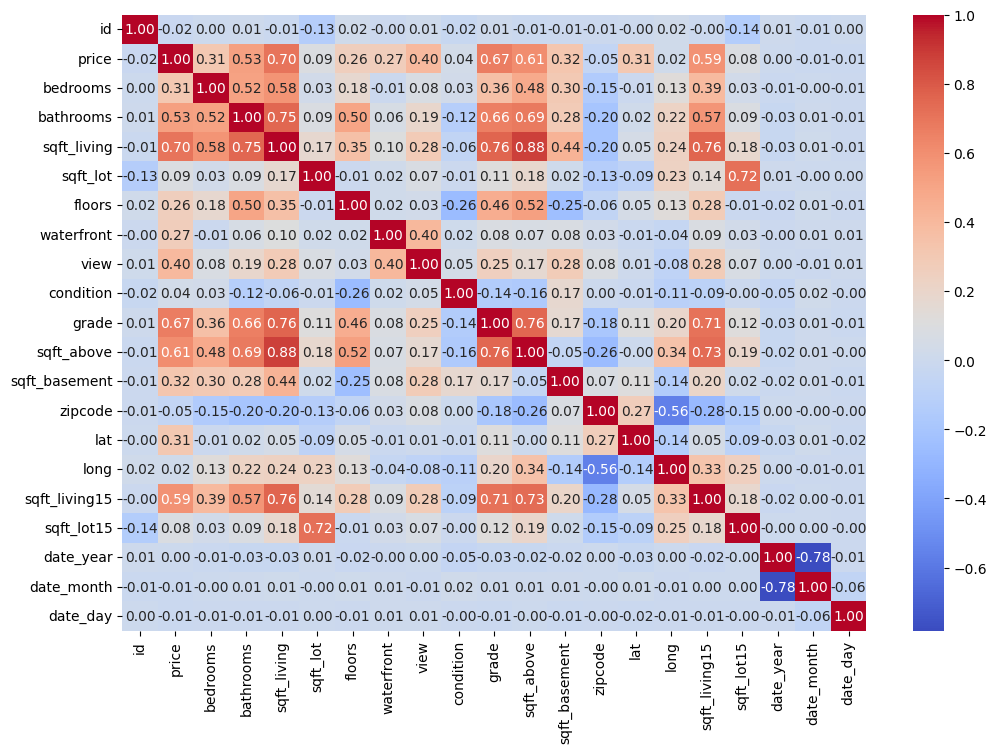

In [110]:
# df1.corr()['price'].sort_values()

# Find & Visualize Correlation with Target Feature!
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['price'].sort_values(ascending=False)

print(correlation_with_target)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [111]:
# Removing outliers columns
def remove_outliers(df,columns):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)

        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

clean_data = remove_outliers(df,df.columns)

In [112]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [125]:
# Extract Features & Target
features =["floors", "lat", "bedrooms", "sqft_living" , "sqft_living15", "sqft_basement" ,"view" ,"bathrooms" , 'grade', 'waterfront', "sqft_above"]
X = clean_data[features]
Y = clean_data['price']

# Split Data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

In [126]:
# Create Linear Regreession Model
reg = linear_model.LinearRegression()

# Train Model
reg.fit(x_train,y_train)

# Test Model
y_pred = reg.predict(x_test)

# Get Accuracy
accuracy = reg.score(x_test, y_test)

# Mean Squared
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5


# Printing
print(f"Mean Squared : {mse}")
print(f"Mean : {rmse}")
print(f"Accuracy : {accuracy}")

Mean Squared : 12974008085.92106
Mean : 113903.5033961689
Accuracy : 0.5713696861682451


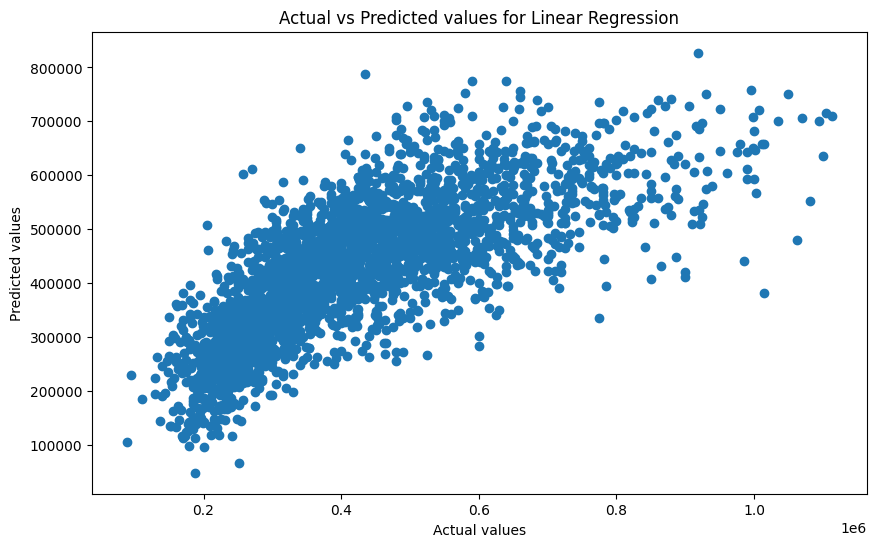

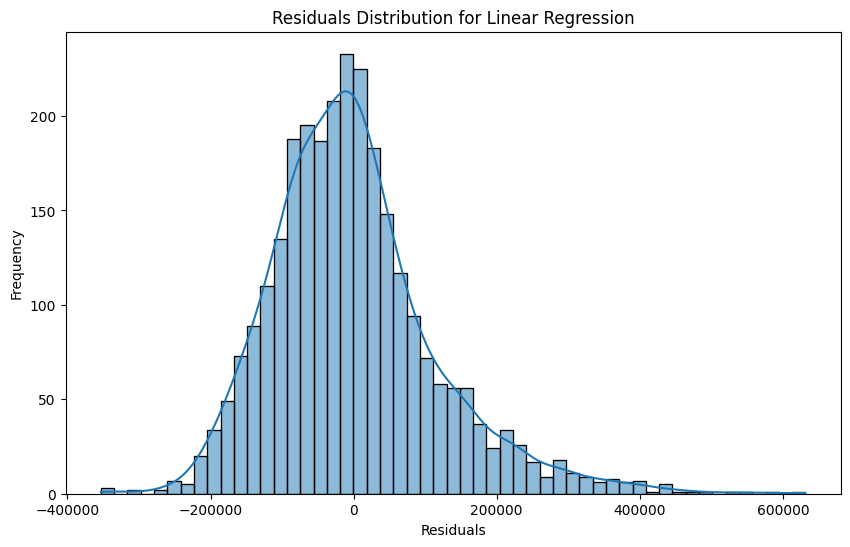

In [115]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted values for Linear Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution for Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [128]:
  # Create Standard
sc = StandardScaler()

# Fit and transform data
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Train Model
reg.fit(x_train,y_train)

# Test Model
y_pred = reg.predict(x_test)

# Get Accuracy
accuracy = reg.score(x_test, y_test)

# Mean Squared
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Printing
print(f"Cross Validation : {cross_val_score(reg, X, Y, cv=10)}")
print(f"Mean Squared : {mse}")
print(f"Mean : {rmse}")
print(f"Accuracy : {accuracy}")

Cross Validation : [0.54507704 0.53800088 0.52531746 0.53129612 0.53158799 0.53475264
 0.54944398 0.56031074 0.55883981 0.58037851]
Mean Squared : 12974521969.99733
Mean : 113905.7591607963
Accuracy : 0.571352708662803


In [129]:
from sklearn.neighbors import KNeighborsRegressor

# Testing n_neighbors and getting highest accuracy
knn_r_acc = []
max = 0
n_neighbors = None

for i in range(1,20,1):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(x_train,y_train)
  test_score = knn.score(x_test, y_test)
  train_score = knn.score(x_train, y_train)
  print(f"K = {i} || Accuracy : {test_score}")

  if max < test_score :
    max = test_score
    n_neighbors = i
  knn_r_acc.append((i, test_score ,train_score))

dt = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])

K = 1 || Accuracy : 0.5791657034129216
K = 2 || Accuracy : 0.6946488423090915
K = 3 || Accuracy : 0.7357748473125892
K = 4 || Accuracy : 0.7430952229780523
K = 5 || Accuracy : 0.7452964362415
K = 6 || Accuracy : 0.7458773242343191
K = 7 || Accuracy : 0.7437063413901108
K = 8 || Accuracy : 0.7449520989996938
K = 9 || Accuracy : 0.7447767027660785
K = 10 || Accuracy : 0.7465933373838627
K = 11 || Accuracy : 0.7471050322963197
K = 12 || Accuracy : 0.7470778658354944
K = 13 || Accuracy : 0.7471145543456686
K = 14 || Accuracy : 0.7450636845272582
K = 15 || Accuracy : 0.7432929726987514
K = 16 || Accuracy : 0.7420305587263052
K = 17 || Accuracy : 0.7409272487798142
K = 18 || Accuracy : 0.7389101679864776
K = 19 || Accuracy : 0.7395331436677665


In [130]:
print(n_neighbors)

13


In [118]:
# Creating Model
knn = KNeighborsRegressor(n_neighbors=n_neighbors)

# Training Model
knn.fit(x_train,y_train)

# Testing Model
test_score = knn.score(x_test, y_test)
train_score = knn.score(x_train, y_train)

y_pred = knn.predict(x_test)

# Mean Squared
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Accuracy : {test_score}")
print(f"Mean Squared : {mse}")
print(f"Mean : {rmse}")
# print(f"Accuracy : {accuracy}")

Accuracy : 0.7382309842409731
Mean Squared : 13372941943.533028
Mean : 115641.43696587754


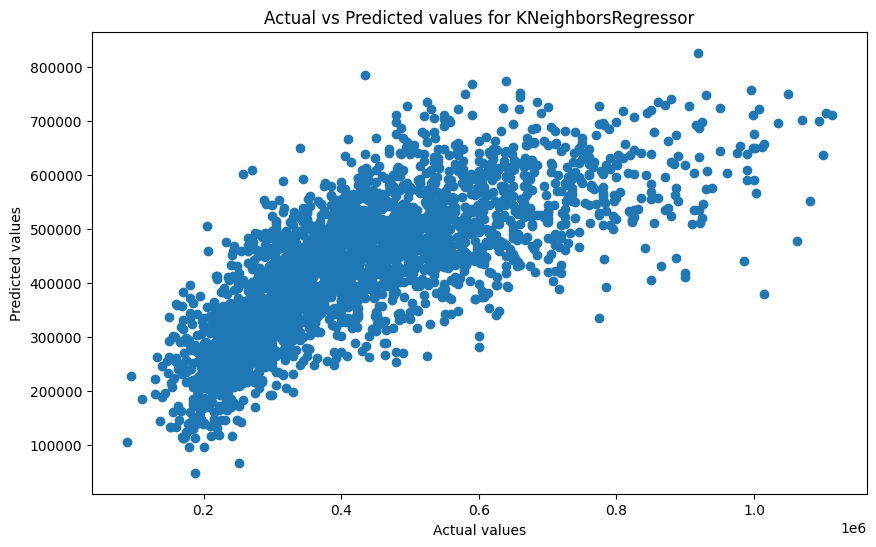

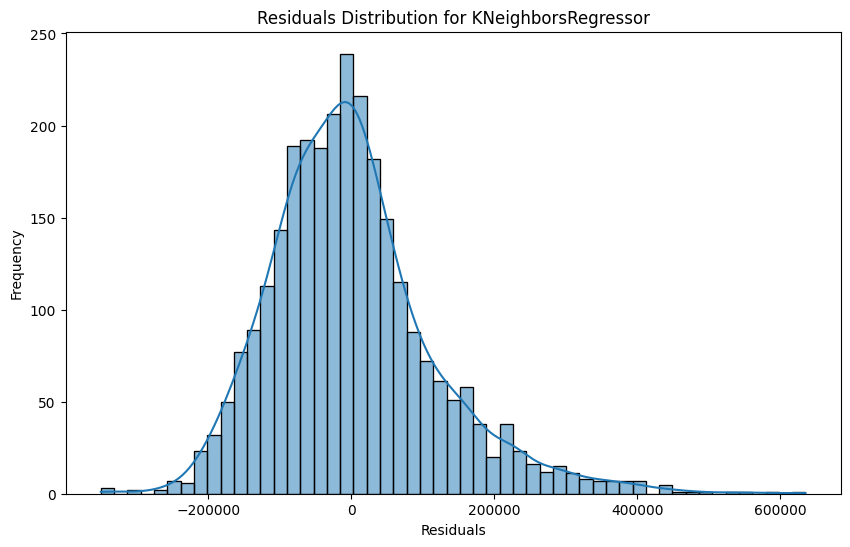

In [120]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted values for KNeighborsRegressor')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution for KNeighborsRegressor')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()